get data!


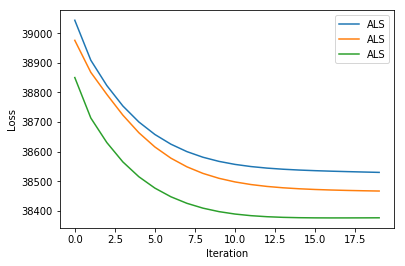

end1!


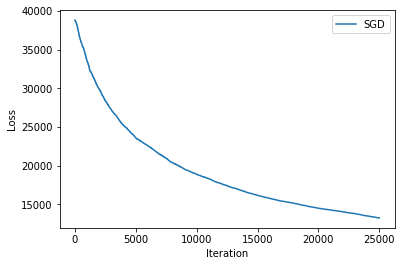

end2


In [1]:
# %load Recommender.py
#!/usr/bin/python
#
# Created by Albert Au Yeung (2010)
#
# An implementation of matrix factorization
#

import numpy
import random
import matplotlib.pyplot as plt

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K,T, steps=20, alpha=0.0001, beta=0.02):#使用ALS方法
    loss=[] #记录损失
    iterations=[] #记录迭代次数
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                 #分别固定P和Q来更新
                P[i]=numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(Q.T,Q)+beta),Q.T),R[i])
                Q[j]=numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(P.T,P)+beta),P.T),R[:,j])
        #print(numpy.shape(P))  
        #print(numpy.shape(Q))
        e=0
        for i in range(len(T)):
            for j in range(len(T[i])):
                if T[i][j] > 0: #计算loss
                    e = e + pow(T[i][j] - numpy.dot(P[i].T,Q[j]), 2)
                    e = e + beta/2 * ( pow(P[i],2) + pow(Q[j],2) )
        loss.append(e)
        iterations.append(step)
        #if e < 0.001:
         #   break
    draw_loss(loss,iterations,"ALS") #画图
    return P, Q



def matrix_factorization_SGD(R, P, Q, K,T,steps=25000,alpha=0.001,beta=0.02):
    Q = Q.T #运用sgd方法
    loss=[]
    iterations=[]
    for step in range(steps):
        i=random.randint(0,len(R)-1) #随机选取一个样本
        for j in range(len(R[i])):
            if R[i][j] > 0:
               eij = R[i][j] - numpy.dot(P[i,:],Q[:,j]) #开始更新
               for k in range(K):
                   P[i][k] =P[i][k]+alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                   Q[k][j] =Q[k][j]+alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        #eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(T)): #计算loss
            for j in range(len(T[i])):
                if T[i][j] > 0:
                    e = e + pow(T[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        loss.append(e)
        iterations.append(step)
        #if e < 0.001:
         #   break
    draw_loss(loss,iterations,"SGD") #画图
    return P, Q.T

###############################################################################
def load_data(): #载入数据
    prefs_train=numpy.zeros((943,1682))
    prefs_vali=numpy.zeros((943,1682))
    file=open('u.data','r',encoding="utf-8")
    for i in range(7000): #7：3的比例划分训练和测试
         line=file.readline()
         (user,movieid,rating,ts)=line.split('\t')
         user=int(user)
         movieid=int(movieid)
         rating=int(rating)
         prefs_train[user-1][movieid-1]=rating
    for i in range(3000):
         line=file.readline()
         (user,movieid,rating,ts)=line.split('\t')
         user=int(user)
         movieid=int(movieid)
         rating=int(rating)
         prefs_vali[user-1][movieid-1]=rating
    file.close()
    return prefs_train,prefs_vali

def draw_loss(loss,iterations,st): #画图
    plt.plot(iterations,loss,label=st)
    plt.xlabel("Iteration")
    #plt.yscale("log")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    R,R_T = load_data()
    print('get data!')
   # R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 3
    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)
    nP, nQ = matrix_factorization(R, P, Q, K,R_T)
    print('end1!')
    nP2,nQ2=matrix_factorization_SGD(R, P, Q, K,R_T)
    print('end2')
    
    
